# Examine outlier data

## Imports and setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors.nearest_centroid import NearestCentroid
plt.rc('font', family='serif')
%matplotlib inline

/usr/local/anaconda3/envs/anomaly/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Initialize data classes

In [2]:
shuttle_classes = {
  1: {'name': 'Rad Flow', 'type': 'good', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  2: {'name': 'Fpv Close', 'type': 'anomaly', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  3: {'name': 'Fpv Open', 'type': 'anomaly', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  4: {'name': 'High', 'type': 'good', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  5: {'name': 'Bypass', 'type': 'good', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  6: {'name': 'Bpv Close', 'type': 'anomaly', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  7: {'name': 'Bpv Open', 'type': 'anomaly', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
}
shuttle_dim = 9
wbc_classes = {
  2: {'name': 'benign','type': 'good', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0},
  4: {'name': 'malignant','type': 'anomaly', 'count': 0, 'data': [], 'centroid': [], 'mean_distance': 0.0, 'dispersion': 0.0}
}
wbc_dim = 9

## Calculations

### Computing centroids

In [14]:
def compute_centroids(raw_data, raw_labels, dataset_classes):
    clf = NearestCentroid()
    clf.fit(raw_data, raw_labels)
    for index, clf_class in enumerate(clf.classes_):
        dataset_classes[clf_class]['centroid'] = clf.centroids_[index]    

### Calculate and sort by class size

In [13]:
def count_and_sort(raw_data, raw_labels, dim, dataset_classes):
    labels, counts = np.unique(raw_labels, return_counts=True)
    combine = np.array([labels, counts])
    for count in combine.T:
        dataset_classes[int(count[0])]['count'] = int(count[1])
    for index, data in enumerate(raw_data):
        dataset_classes[raw_labels[index]]['data'].append(data)
    dataset_classes = {k: v for k, v in sorted(dataset_classes.items(), key=lambda e: e[1]['count'], reverse=True)}
    return dataset_classes

### Find mean and standard deviation of distances to centroid

In [15]:
def mean_distance(centroid, points):
    distances = [np.linalg.norm(centroid - point) for point in points]
    return np.mean(distances)
def distance_dispersion(centroid, points):
    distances = [np.linalg.norm(centroid - point) for point in points]
    return np.std(distances)

### Wrapper function for the above

In [16]:
def analyze_clusters(dataset_classes):
    for dataset_class in dataset_classes.items():
        dataset_class[1]['mean_distance'] = mean_distance(dataset_class[1]['centroid'], dataset_class[1]['data'])
        dataset_class[1]['dispersion'] = distance_dispersion(dataset_class[1]['centroid'], dataset_class[1]['data'])

### Print out all properties

In [17]:
def print_properties(dataset_classes):
  for dataset_class in dataset_classes.items():
    print('Class #' + str(dataset_class[0]) + ': ' + dataset_class[1]['name'] + ' with ' + str(dataset_class[1]['count']) + ' instances - ' + dataset_class[1]['type'])
    print('\tMean distance: ', '{:.2f}'.format(dataset_class[1]['mean_distance']))
    print('\tSD of distances: ', '{:.2f}'.format(dataset_class[1]['dispersion']))

### Plot relevant properties

In [18]:
def plot_properties(dataset_classes, title):
    good_class_num = []
    good_counts = []
    good_mean_distances = []
    good_distance_dispersions = []
    anomaly_class_num = []
    anomaly_counts = []
    anomaly_mean_distances = []
    anomaly_distance_dispersions = []
    for dataset_class in dataset_classes.items():
        if (dataset_class[1]['type'] is 'good'):
            good_class_num.append(dataset_class[0])
            good_counts.append(dataset_class[1]['count'])
            good_mean_distances.append(dataset_class[1]['mean_distance'])
            good_distance_dispersions.append(dataset_class[1]['dispersion'])
        else:
            anomaly_class_num.append(dataset_class[0])
            anomaly_counts.append(dataset_class[1]['count'])
            anomaly_mean_distances.append(dataset_class[1]['mean_distance'])
            anomaly_distance_dispersions.append(dataset_class[1]['dispersion'])

    mean_fig, mean_ax = plt.subplots()
    good = mean_ax.scatter(good_counts, good_mean_distances, c='blue')
    anomaly = mean_ax.scatter(anomaly_counts, anomaly_mean_distances, c='red')
    plt.title(title + ' I')
    plt.xlabel('Number of instances for data class')
    plt.ylabel('Mean distance from centroid')
    for index, label in enumerate(good_class_num):
        mean_ax.annotate(label, xy=(good_counts[index], good_mean_distances[index]), xytext=(5, 5), textcoords='offset pixels')
    for index, label in enumerate(anomaly_class_num):
        mean_ax.annotate(label, xy=(anomaly_counts[index], anomaly_mean_distances[index]), xytext=(5, 5), textcoords='offset pixels')
    plt.legend((good, anomaly), ('Good', 'Anomaly'), loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

    dispersion_fig, dispersion_ax = plt.subplots()
    good = dispersion_ax.scatter(good_counts, good_distance_dispersions, c='blue')
    anomaly = dispersion_ax.scatter(anomaly_counts, anomaly_distance_dispersions, c='red')
    plt.title(title + ' II')
    plt.xlabel('Number of instances for data class')
    plt.ylabel('SD of distances from centroid')
    for index, label in enumerate(good_class_num):
        dispersion_ax.annotate(label, xy=(good_counts[index], good_distance_dispersions[index]), xytext=(5, 5), textcoords='offset pixels')
    for index, label in enumerate(anomaly_class_num):
        dispersion_ax.annotate(label, xy=(anomaly_counts[index], anomaly_distance_dispersions[index]), xytext=(5, 5), textcoords='offset pixels')
    plt.legend((good, anomaly), ('Good', 'Anomaly'), loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

    fig, ax = plt.subplots()
    good = ax.scatter(good_mean_distances, good_distance_dispersions, c='blue')
    anomaly = ax.scatter(anomaly_mean_distances, anomaly_distance_dispersions, c='red')
    plt.title(title + ' III')
    plt.xlabel('Mean distance from centroid')
    plt.ylabel('SD of distances from centroid')
    for index, label in enumerate(good_class_num):
        ax.annotate(label, xy=(good_mean_distances[index], good_distance_dispersions[index]), xytext=(5, 5), textcoords='offset pixels')
    for index, label in enumerate(anomaly_class_num):
        ax.annotate(label, xy=(anomaly_mean_distances[index], anomaly_distance_dispersions[index]), xytext=(5, 5), textcoords='offset pixels')
    plt.legend((good, anomaly), ('Good', 'Anomaly'), loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

### Run it all

Class #1: Rad Flow with 34108 instances - good
	Mean distance:  30.79
	SD of distances:  157.63
Class #4: High with 6748 instances - good
	Mean distance:  48.45
	SD of distances:  246.18
Class #5: Bypass with 2458 instances - good
	Mean distance:  95.28
	SD of distances:  373.65
Class #3: Fpv Open with 132 instances - anomaly
	Mean distance:  52.81
	SD of distances:  31.27
Class #2: Fpv Close with 37 instances - anomaly
	Mean distance:  60.32
	SD of distances:  26.87
Class #7: Bpv Open with 11 instances - anomaly
	Mean distance:  1468.70
	SD of distances:  492.42
Class #6: Bpv Close with 6 instances - anomaly
	Mean distance:  338.64
	SD of distances:  211.49
Class #2: benign with 444 instances - good
	Mean distance:  2.57
	SD of distances:  1.77
Class #4: malignant with 239 instances - anomaly
	Mean distance:  8.07
	SD of distances:  1.87


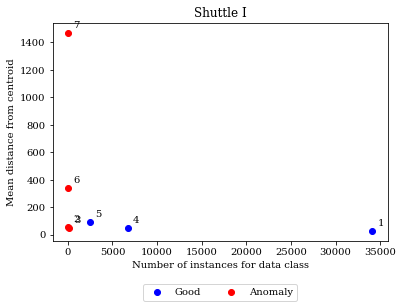

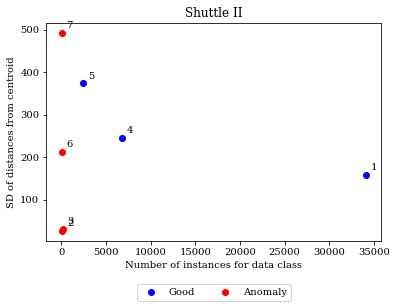

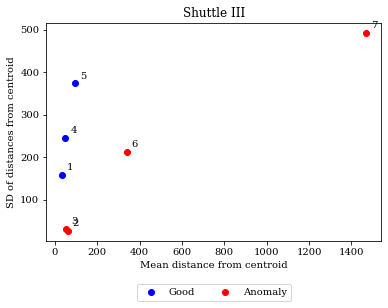

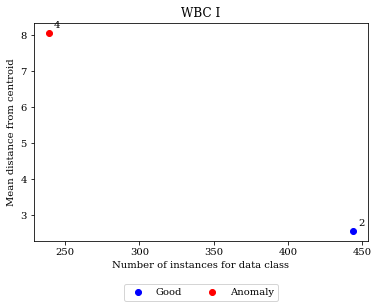

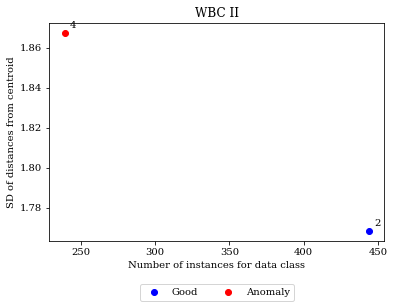

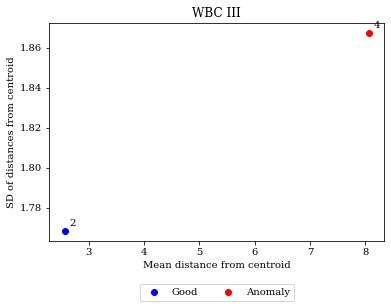

In [12]:
shuttle = np.loadtxt('./data/shuttle/shuttle.trn', delimiter=' ')
shuttle_data = np.delete(shuttle, np.s_[shuttle_dim:], 1)
shuttle_labels = [int(label) for label in np.delete(shuttle, np.s_[:shuttle_dim], 1)]
shuttle_classes = count_and_sort(shuttle_data, shuttle_labels, shuttle_dim, shuttle_classes)

wbc = np.loadtxt('./data/wbc/wbc.data', delimiter=',')
wbc_data = np.delete(wbc, [0, wbc_dim + 1], 1)
wbc_labels = [int(label) for label in np.delete(wbc, np.s_[:wbc_dim + 1], 1)]
wbc_classes = count_and_sort(wbc_data, wbc_labels, wbc_dim, wbc_classes)

compute_centroids(shuttle_data, shuttle_labels, shuttle_classes)
compute_centroids(wbc_data, wbc_labels, wbc_classes)

analyze_clusters(shuttle_classes)
analyze_clusters(wbc_classes)

print_properties(shuttle_classes)
print_properties(wbc_classes)

plot_properties(shuttle_classes, 'Shuttle')
plot_properties(wbc_classes, 'WBC')